In [1]:
%matplotlib inline

# So it's not necessary to restart the kernel after updating any other file
%load_ext autoreload
%autoreload 2

#import matplotlib.pyplot as plt

In [2]:
from BNReasoner import BNReasoner
from BayesNet import BayesNet
import networkx as nx

net = BayesNet()
bn = BNReasoner(net)

net.load_from_bifxml('testing/lecture_example.BIFXML')
net.get_all_variables()
graph = net.get_interaction_graph()
#net.draw_structure()

['Winter?', 'Sprinkler?', 'Rain?', 'Wet Grass?', 'Slippery Road?']

In [ ]:
# Sets XSet and Yset are independent given EvSet 
# # iff every path between a variable in XSet and a variable in YSet 
# are blocked by a variable in EvSet

def d_sep_indep(G,XSet,EvSet,YSet):
    # Find all undirected paths between vars of XSet and YSet
    for X in XSet:
        for Y in YSet:
            for path in nx.all_shortest_paths(G, X, Y):
                # Only if ALL paths are blocked, there is independence
                #if blocked(path, EvSet) == False:
                 #   return False
                print(block(path,X,Y,EvSet))
                print(len(path))    
    return True


def block (p, X,Y,Z):
    # sequential valve
    for step in range(0,len(p)-2):
        if (p[step+1] in net.get_children(p[step]) and p[step+2] in net.get_children(p[step+1])):
            if p[step+1] not in Z:
                return False
        #converging valve
        if p[step+1] in net.get_children(p[step]) and p[step+1] in net.get_children(p[step+2]):
            if p[step+1] in Z or nx.descendants(graph,p[step+1]) in Z:
                return False
        #diverging valve
        if p[step] in net.get_children(p[step+1]) and p[step+2] in net.get_children(p[step+1]):
            return False 
    

# Check if path is blocked by some variable in EvSet
def blocked(p, evlist):
    ev_on_path = intersection(p, evlist)
    # If intersectionSet is not empty, the path is blocked
    if len(ev_on_path):
        return True
    else: 
        return False
        
# Return intersectionset of two lists        
def intersection(A, B):
    return set(A).intersection(B)



In [ ]:
#check 1: winter is not independent of wet grass given JUST rain
print(d_sep_indep(graph,['Winter?'],['Rain?'],['Wet Grass?']))

#check 2: winter is independent of wet grass given rain AND sprinkler
print(d_sep_indep(graph,['Winter?'],['Rain?','Sprinkler?'],['Wet Grass?']))

#check 3: Winter is independent of slippery road given rain 
print(d_sep_indep(graph,['Winter?'],['Rain?'],['Slippery Road?']))

#check 4: Winter is NOT independent of Slippery road given sprinkler and wet grass
print(d_sep_indep(graph,['Winter?'],['Sprinkler?','Wet Grass?'],['Slippery Road?']))



In [7]:
# Joint probability gets the full truth table with probability
p = bn.joint_probability()
p.head()

,Winter?,Sprinkler?,Rain?,Wet Grass?,Slippery Road?,p
0,True,True,True,True,True,0.06384
1,False,True,True,True,True,0.01995
2,True,True,True,False,True,0.00336
3,False,True,True,False,True,0.00105
4,True,False,True,True,True,0.21504


In [6]:
bn.marginal_distribution(
    ["Winter?", "Sprinkler?", "Wet Grass?"],
    evidence={"Wet Grass?": False, "Sprinkler?": True},
)

,Winter?,Sprinkler?,Wet Grass?,p
2,False,True,False,0.0285
6,True,True,False,0.0072


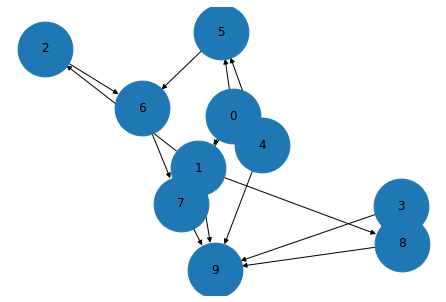

In [62]:
net = BayesNet()
net.load_random(10, 3)
net.draw_structure()